# Many to One RNN

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN
import numpy as np


x = np.array([[[1.], [2.], [3.], [4.], [5.]]])
y = np.array([[6.]])


xInput = Input(batch_shape=(None, 5, 1))
xLstm = SimpleRNN(3)(xInput)
xOutput = Dense(1)(xLstm)


model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())

In [ ]:
model.fit(x, y, epochs=50, batch_size=1, verbose=0)
model.predict(x)

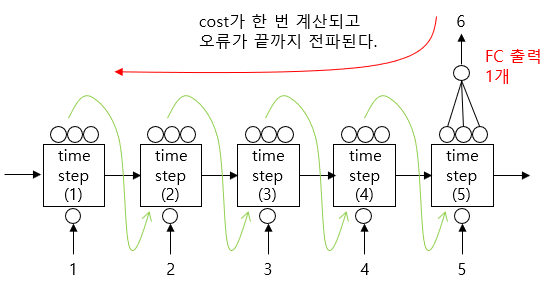

# Many to Many

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, TimeDistributed
import numpy as np


x = np.array([[[1.], [2.], [3.], [4.], [5.]]])
y = np.array([[[2.], [3.], [4.], [5.], [6.]]])
xInput = Input(batch_shape=(None, 5, 1))
xLstm = SimpleRNN(3, return_sequences=True)(xInput)
xOutput = TimeDistributed(Dense(1))(xLstm)
model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary)

### return_sequences=True : RNN의 중간 스텝의 출력을 모두 사용
### TimeDistributed() : 각 스텝마다 cost (오류)를 계산해서 하위 스텝으로 오류를 전파하여 각 weight를 업데이트함


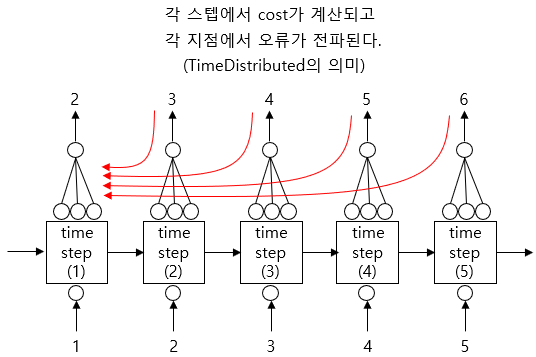

In [ ]:
xInput = Input(batch_shape=(None, 5, 1))
xLstm = SimpleRNN(3, return_sequences=True)(xInput)
xOutput = Dense(1)(xLstm)
model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

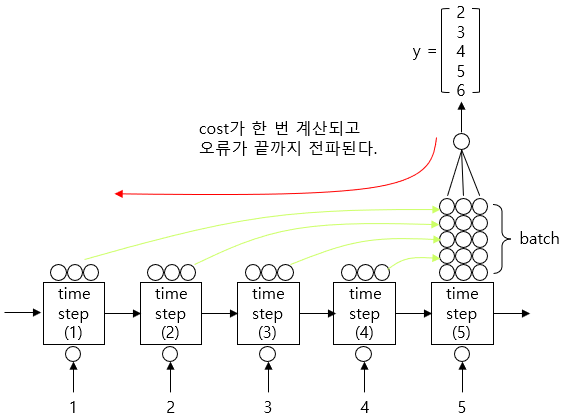

# Multi-layer RNN

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM
import numpy as np


x = np.array([[[1.], [2.], [3.], [4.], [5.]]])
y = np.array([[6.]])


xInput = Input(batch_shape=(None, 5, 1))
xLstm_1 = LSTM(3, return_sequences=True)(xInput)
xLstm_2 = LSTM(3)(xLstm_1)
xOutput = Dense(1)(xLstm_2)


model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

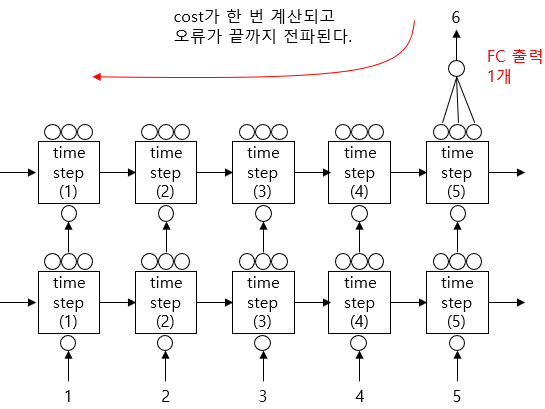

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM
import numpy as np
import matplotlib.pyplot as plt



 # 학습 데이터를 생성한다.
 # ex: data = [1,2,3,4,5,6,7,8,9,10]가 주어졌을 때 generateX(data, 5)를 실행하면
 # 아래와 같은 학습데이터 변환한다.
 #
 # x                      y
 # ---------              -
 # 1,2,3,4,5              6
 # 2,3,4,5,6              7
 # 3,4,5,6,7              8
 # ...
def generateX(a, n):
    x_train = []
    y_train = []
    for i in range(len(a)):
        x = a[i:(i + n)]
        if (i + n) < len(a):
            x_train.append(x)
            y_train.append(a[i + n])
        else:
            break
    return np.array(x_train), np.array(y_train)


# Sine 함수에 노이즈를 섞은 데이터로 학습 데이터 100개를 생성한다
data = np.sin(2 * np.pi * 0.03 * np.arange(0, 100)) + np.random.random(100)
x, y = generateX(data, 10)
x = x.reshape(-1,10,1)
y = y.reshape(-1,1)


 # 학습용 데이터와 시험용 데이터로 구분
x_train = x[:70, :, :]
y_train = y[:70:, :]
x_test = x[70:, :, :]
y_test = y[70:, :]


# RNN 모델을 생성 및 학습


a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_hat.reshape(20,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

# 호흡기 질환 사망자 수 데이터

In [1]:
import statsmodels.api as sm

data = sm.datasets.get_rdataset("deaths", "MASS")
df = data.data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    72 non-null     float64
 1   value   72 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


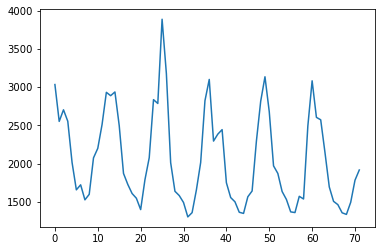

In [3]:
df.value.plot()